# Trabalho 02
### Disciplina: Mineração e Ciência de Dados

**Aluno:** Francisco Alessandro Feitoza da Silva
**Matricula:** 543032


In [208]:
#!pip install statsmodels
#!pip install distfit


import matplotlib.pyplot as matplot
import pandas
import numpy

import statsmodels.api as statsmodels
import pylab
from distfit import distfit

In [216]:
ofertas = pandas.read_csv('seminovos.csv', delimiter=';') #amostra: 300 ofertas

# colunas são: make; model; version; year_manufacture; year_model; km; price; location


           make      model                                        version  \
0       Citroen  C4 Cactus                     1.6 VTI 120 FLEX FEEL EAT6   
1          Fiat    Fiorino  1.4 MPI FURGÃO HARD WORKING 8V FLEX 2P MANUAL   
2          Audi         A3    1.4 TFSI FLEX SEDAN PRESTIGE PLUS TIPTRONIC   
3       Renault       Kwid               1.0 12V SCE FLEX OUTSIDER MANUAL   
4       Renault       Kwid                    1.0 12V SCE FLEX ZEN MANUAL   
..          ...        ...                                            ...   
295        Jeep   Renegade           1.8 16V FLEX LONGITUDE 4P AUTOMÁTICO   
296  Volkswagen     Voyage                1.0 12V MPI TOTALFLEX 4P MANUAL   
297     Renault     Captur              1.6 16V SCE FLEX INTENSE X-TRONIC   
298        Ford   Ecosport                  1.5 TI-VCT FLEX SE AUTOMÁTICO   
299  Volkswagen      Jetta        1.4 250 TSI TOTAL FLEX R-LINE TIPTRONIC   

     year_manufacture  year_model        km     price             location 

#### ITEM A
Medidas de Tendência Central (média, mediana e etc)

#### ITEM B
Medidas de Variabilidade (variância)

In [219]:
price = ofertas['price']

priceMax = price.max()
priceMin = price.min()

print('----------------------------------------')
print('-- Utilizando coluna PRICE')
print('----------------------------------------')
print('-- Média: ', round(price.mean(), 3))
print('-- Moda: ', price.mode().iloc[0])
print('-- Mediana: ', price.median())
print('-- Máximo: ', priceMax)
print('-- Mínimo: ', priceMin)
print('-- Desvio Padrão: ', round(price.std(), 3))
print('-- Desvio Absoluto: ', round(price.mad(), 3))
print('-- Variância: ', round(price.var(), 3))
print('-- Amplitude: ', price.max() - price.min())
print('-- Quantil: ', price.quantile(q=0.25))
print('----------------------------------------')


----------------------------------------
-- Utilizando coluna PRICE
----------------------------------------
-- Média:  97061.817
-- Moda:  91590.0
-- Mediana:  91590.0
-- Máximo:  259990.0
-- Mínimo:  1030.0
-- Desvio Padrão:  36149.66
-- Desvio Absoluto:  21494.11
-- Variância:  1306797927.542
-- Amplitude:  258960.0
-- Quantil:  85540.0
----------------------------------------


#### ITEM C
Tabela de frequência e Histograma

In [220]:
frequencia_absoluta_ano_modelo = pandas.Series(ofertas['year_model']).value_counts()
frequencia_absoluta_marca = pandas.Series(ofertas['make']).value_counts()

print('--- FREQ. ABSOLUT. ANO MODELO ---')
print(frequencia_absoluta_ano_modelo, '\n')


print('--- FREQ. ABSOLUT. MARCA ---')
print(frequencia_absoluta_marca, '\n')


--- FREQ. ABSOLUT. ANO MODELO ---
2022    156
2021     94
2020     43
2019      4
2018      2
2017      1
Name: year_model, dtype: int64 

--- FREQ. ABSOLUT. MARCA ---
Peugeot          106
Volkswagen        73
Citroen           36
Renault           29
Jeep              16
Fiat              11
Chevrolet          6
Hyundai            5
Bmw                5
Ford               5
Audi               3
Toyota             2
Porsche            1
Mercedes-Benz      1
Honda              1
Name: make, dtype: int64 



In [224]:
print ('- FREQ. RELATIVA ANO MODELO -')
print (
    frequencia_absoluta_ano_modelo / len (ofertas['year_model'])
)

- FREQ. RELATIVA ANO MODELO -
2022    0.520000
2021    0.313333
2020    0.143333
2019    0.013333
2018    0.006667
2017    0.003333
Name: year_model, dtype: float64


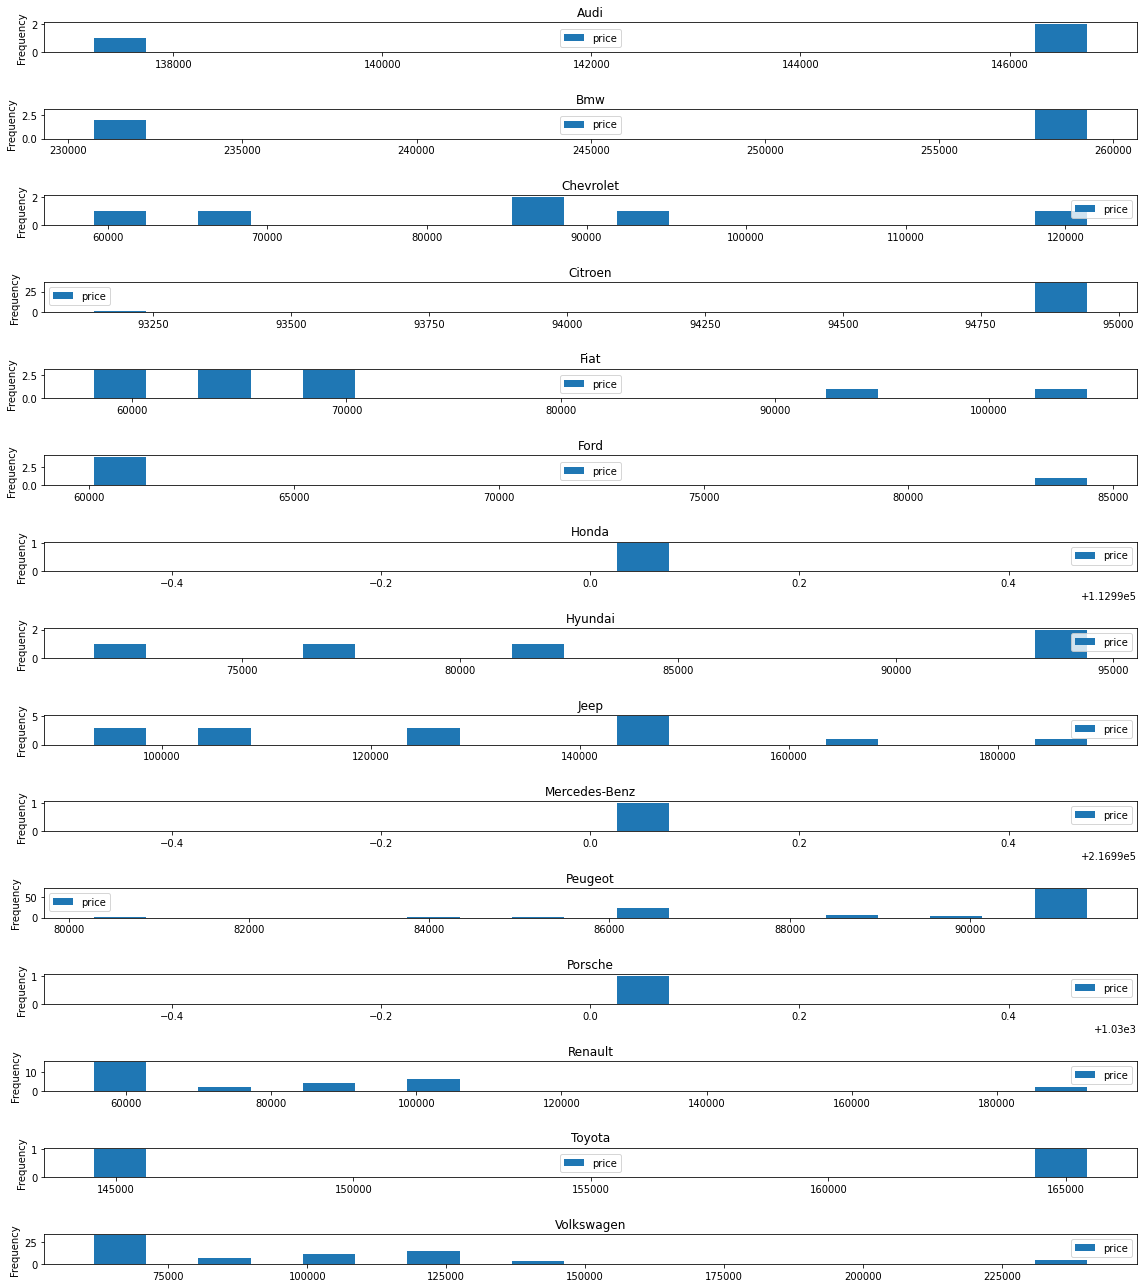

In [226]:
# Histograma por ano_modelo x marca

dataFrame = pandas.DataFrame({
    "price": ofertas['price'], 
    "make": ofertas['make']
})

ax = dataFrame.plot.hist(
    column=["price"], 
    by="make", 
    figsize=(16, 18), 
    rwidth=0.5
)

matplot.tight_layout()

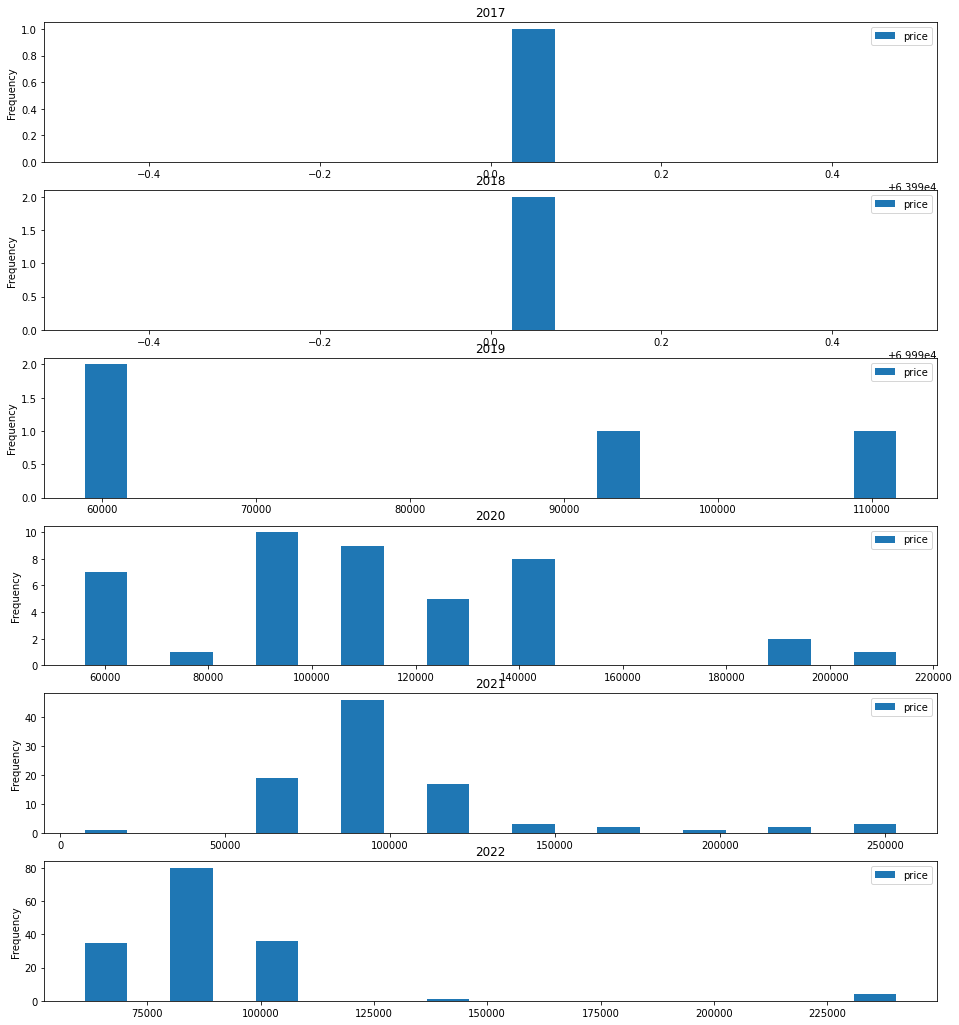

In [227]:
# Histograma por preço x ano modelo

dataFrame = pandas.DataFrame({
    "price": ofertas['price'], 
    "year_model": ofertas['year_model']
})

grafico = dataFrame.plot.hist(
    column=["price"], 
    by="year_model", 
    figsize=(16, 18), 
    rwidth=0.5
)


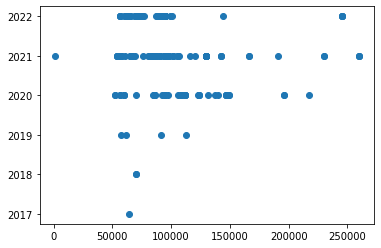

In [228]:
matplot.scatter(
    ofertas['price'], 
    ofertas['year_model'],
)

matplot.show()

#### ITEM D
Boxplot

In [229]:
def filtrarOfertas (coluna, valor):
    return list(
        filter(
            lambda cadaOferta : cadaOferta == valor, ofertas[coluna]
        )
    ) 

print(
    "Ano Modelo 2018: ",
    len(filtrarOfertas('year_model', 2018))
)
print(
    "Ano Modelo 2022: ",
    len(filtrarOfertas('year_model', 2022))
)
print(
    "Marca Chevrolet: ",
    len(filtrarOfertas('make', 'Chevrolet'))
)
print(
    "Marca Volkswagen: ",
    len(filtrarOfertas('make', 'Volkswagen'))
)




Ano Modelo 2018:  2
Ano Modelo 2022:  156
Marca Chevrolet:  6
Marca Volkswagen:  73


<AxesSubplot:title={'center':'year_model'}, xlabel='make'>

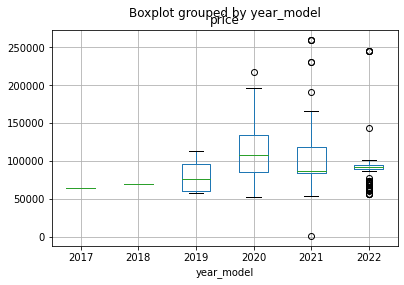

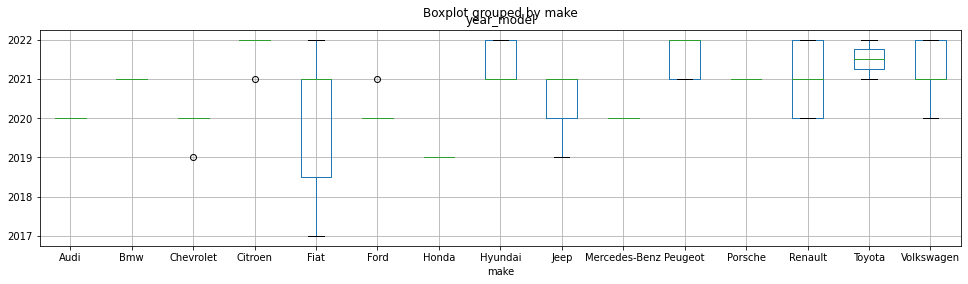

In [230]:

# agrupando por ano do modelo do veículo
ofertas.boxplot(by ='year_model', column =['price'])


# agrupando por ano do modelo do veículo
ofertas.boxplot(by ='make', column =['year_model'], figsize=(16, 4))

#### ITEM E
QQ-Plot



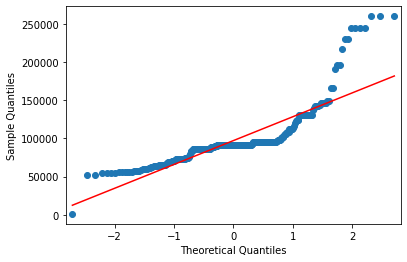

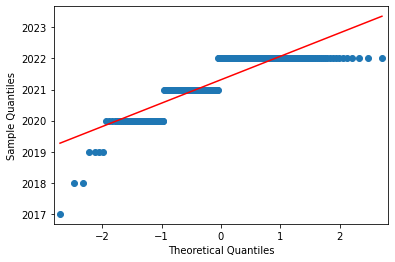

In [231]:
statsmodels.qqplot(ofertas['price'], line='r')
pylab.show()

statsmodels.qqplot(ofertas['year_model'], line='r')
pylab.show()

#### ITEM H 
Best fit distribution

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.67807e-09] [loc=97061.817 scale=36089.360]
[distfit] >[expon     ] [0.00 sec] [RSS: 4.11781e-09] [loc=1030.000 scale=96031.817]
[distfit] >[pareto    ] [0.05 sec] [RSS: 6.86261e-09] [loc=-0.843 scale=1030.843]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 7.75698e-10] [loc=91590.000 scale=28215.494]
[distfit] >[t         ] [0.10 sec] [RSS: 2.67849e-09] [loc=96935.766 scale=36165.644]
[distfit] >[genextreme] [0.23 sec] [RSS: 4.74912e-09] [loc=1031.275 scale=9.726]
[distfit] >[gamma     ] [0.14 sec] [RSS: 4.67656e-09] [loc=51990.000 scale=6.372]
[distfit] >[lognorm   ] [0.21 sec] [RSS: 2.34095e-09] [loc=-27769.534 scale=120780.852]
[distfit] >[beta      ] [0.18 sec] [RSS: 2.5059e-09] [loc=-7455.425 scale=63369943306.197]
[distfit] >[uniform   ] [0.00 sec] [RSS: 3.93096e-09] [loc=1030.000 scale=258960.000]
[distfit] >[loggamma  ] [0.12 sec] [RSS: 2.73465e-09] [loc=-13967514.794 scale=1814544.809]
[distfit] >Comp

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ndweibull\nRSS(c=0.796218, loc=91590, scale=28215.5)'}, xlabel='Values', ylabel='Frequency'>)

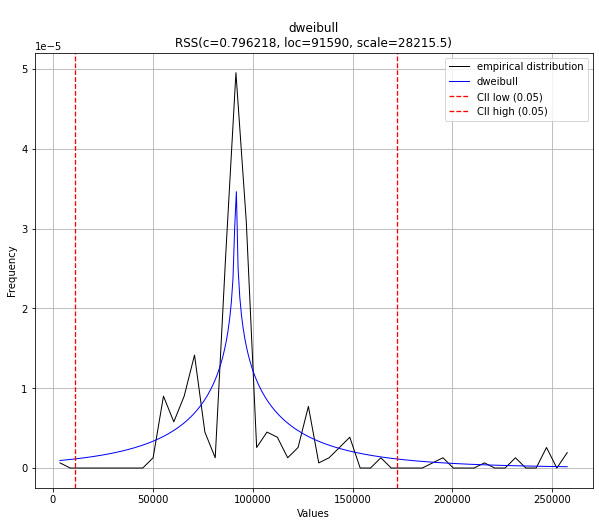

In [232]:
prices = distfit()
prices.fit_transform(ofertas['price'])

prices.plot()